In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random as python_random

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random as python_random

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df.head()

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0) # 검증셋 0.8 x 0.25 = 0.2

# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9400
Test accuracy: 0.9399999976158142


### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

### 에포크별 모델 성능 체크

In [34]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 30)                390       
                                                                 
 dense_105 (Dense)           (None, 12)                372       
                                                                 
 dense_106 (Dense)           (None, 8)                 104       
                                                                 
 dense_107 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 저장의 조건을 설정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/01-0.2115.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/02-0.1546.hdf5

Epoch 3: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/03-0.1331.hdf5

Epoch 4: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/04-0.7615.hdf5

Epoch 5: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/05-0.7631.hdf5

Epoch 6: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/06-0.7631.hdf5

Epoch 7: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/07-0.7638.hdf5

Epoch 8: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/08-0.7823.hdf5

Epoch 9: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/09-0.8185.hdf5

Epoch 10: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/10-0.8669.hdf5

Epoch 11: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/11-0.8815.hdf5

Epoch 12: saving model to /content/dr

In [41]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9400
Test accuracy: 0.9399999976158142


### 그래프로 과적합 확인하기

History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [2]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [43]:
# Print the keys of the history object to understand what metrics are available
print(history.history.keys())

# To access a specific metric, for example, the training loss, you can do:
print(history.history['loss'])

# If you also have validation metrics, you can access them like this:
print(history.history['val_loss'])  # For validation loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.1734825074672699, 0.17347733676433563, 0.17484748363494873, 0.1731831580400467, 0.171177476644516, 0.16909357905387878, 0.16752414405345917, 0.16628438234329224, 0.16555556654930115, 0.16473321616649628, 0.16481252014636993, 0.16286516189575195, 0.16261933743953705, 0.16142602264881134, 0.15969714522361755, 0.15913139283657074, 0.15811902284622192, 0.15733714401721954, 0.15685276687145233, 0.15663976967334747, 0.15418846905231476, 0.1542130410671234, 0.15252475440502167, 0.15153473615646362, 0.15104423463344574, 0.14973710477352142, 0.14888985455036163, 0.1483989953994751, 0.1475173383951187, 0.14706654846668243, 0.1461775004863739, 0.14486774802207947, 0.14412547647953033, 0.1442018747329712, 0.14312225580215454, 0.14413787424564362, 0.1436842978000641, 0.14012223482131958, 0.13981160521507263, 0.13936825096607208, 0.1399650275707245, 0.1420813500881195, 0.13943977653980255, 0.1440240889787674, 0.13573521375656128, 0.13519

In [3]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.173483,0.935591,0.174749,0.932308
1,0.173477,0.939441,0.173344,0.933077
2,0.174847,0.936618,0.177495,0.930769
3,0.173183,0.938158,0.171116,0.933846
4,0.171177,0.939954,0.170408,0.932308


In [4]:
hist_df.shape

(2000, 4)

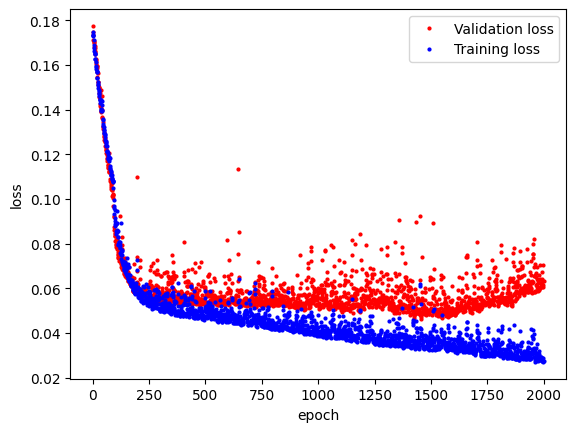

In [45]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

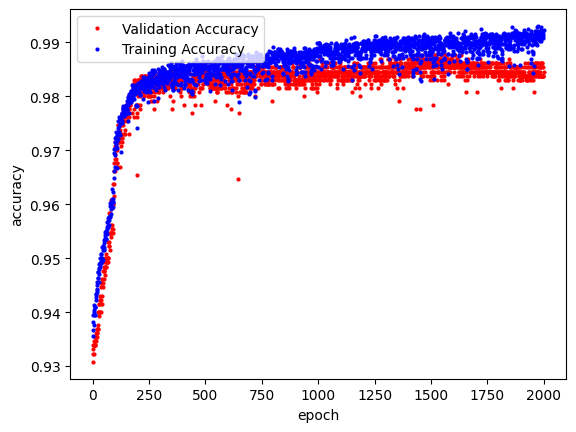

In [47]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옵니다.
# 'acc' 대신 'accuracy'를 사용해야 할 수도 있습니다. 이는 Keras 버전에 따라 다릅니다.
y_acc = history.history['accuracy']  # 'acc' 대신 'accuracy'를 사용하는 경우가 있습니다.
y_val_acc = history.history['val_accuracy']  # 마찬가지로 'val_accuracy'를 사용

# x 값을 지정합니다.
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시합니다.
plt.plot(x_len, y_val_acc, "o", c="red", markersize=2, label='Validation Accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Training Accuracy')

# 범례와 축 라벨을 추가합니다.
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 그래프를 표시합니다.
plt.show()

### 학습의 자동 중단

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 30)                390       
                                                                 
 dense_117 (Dense)           (None, 12)                372       
                                                                 
 dense_118 (Dense)           (None, 8)                 104       
                                                                 
 dense_119 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

### 학습의 자동 중단 및 최적화 모델 저장

In [62]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
                  verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0383 - accuracy: 0.9880

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 1s 77ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0575 - val_accuracy: 0.9838
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0581 - val_accuracy: 0.9838
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0687 - val_accuracy: 0.9815
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0667 - val_accuracy: 0.9823
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0488 - accuracy: 0.9838 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0590 - val_accuracy: 0.9808
Epoch 8/2000
8/8 [=============

In [63]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9877
Test accuracy: 0.9876922965049744


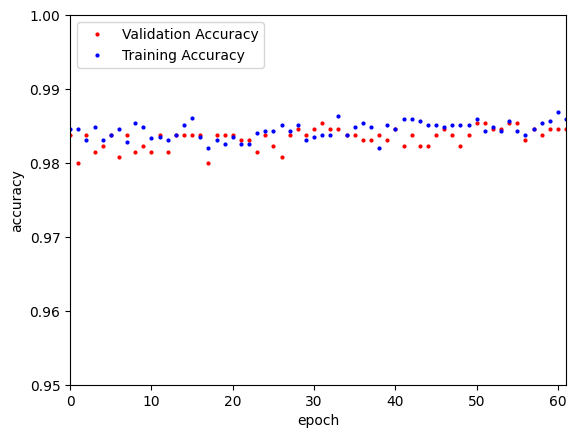

In [67]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옵니다.
# 'acc' 대신 'accuracy'를 사용해야 할 수도 있습니다. 이는 Keras 버전에 따라 다릅니다.
y_acc = history.history['accuracy']  # 'acc' 대신 'accuracy'를 사용하는 경우가 있습니다.
y_val_acc = history.history['val_accuracy']  # 마찬가지로 'val_accuracy'를 사용

# x 값을 지정합니다.
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시합니다.
plt.plot(x_len, y_val_acc, "o", c="red", markersize=2, label='Validation Accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Training Accuracy')

# 범례와 축 라벨을 추가합니다.
plt.legend(loc='upper left')
plt.xlim(0, len(y_acc)-1)
plt.ylim(0.95, 1.0)
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 그래프를 표시합니다.
plt.show()

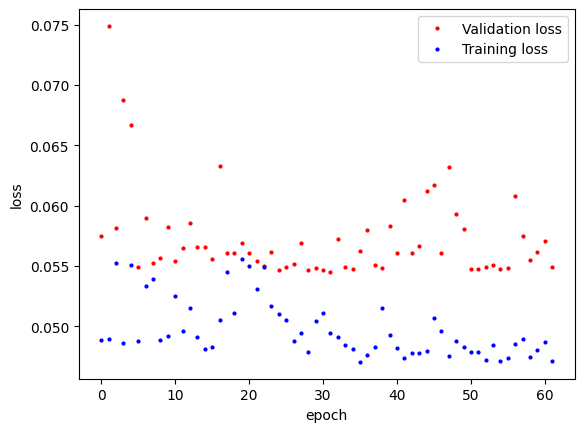

In [69]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=history.history['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=history.history['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [70]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9877
Test accuracy: 0.9876922965049744
